In [1]:
import os, sys
import numpy as np
import ants
import argparse
import shutil
import logging
import subprocess
import tqdm
import matplotlib.pyplot as plt 

In [148]:
def plot_qc(image, mask, patient_id ='test'):
    fig, axs = plt.subplots(3,3,figsize=(12,12))
    idx = np.argsort(mask.sum(axis=(0,1)))[-15::5]
    for i in range(3):
        axs[i, 0].imshow(image[..., idx[i]], cmap='gray')
        axs[i, 1].imshow(mask[..., idx[i]]*200, cmap = 'afmhot')
        axs[i, 2].imshow(image[..., idx[i]], cmap='gray')
        axs[i, 2].imshow(mask[..., idx[i]]*5000, alpha= 0.4, cmap = 'afmhot')
    axs[0,0].set_title(patient_id)
    plt.tight_layout()
    plt.savefig(f'{patient_id}.png', dpi=300, transparent=True)
    plt.plot()

In [154]:
mask = ants.image_read('/anvar/public_datasets/preproc_study/gbm/3a_atlas/TCGA-08-0520/CT1_SEG.nii.gz')
image = ants.image_read('/anvar/public_datasets/preproc_study/gbm/3a_atlas/TCGA-08-0520/T1.nii.gz')

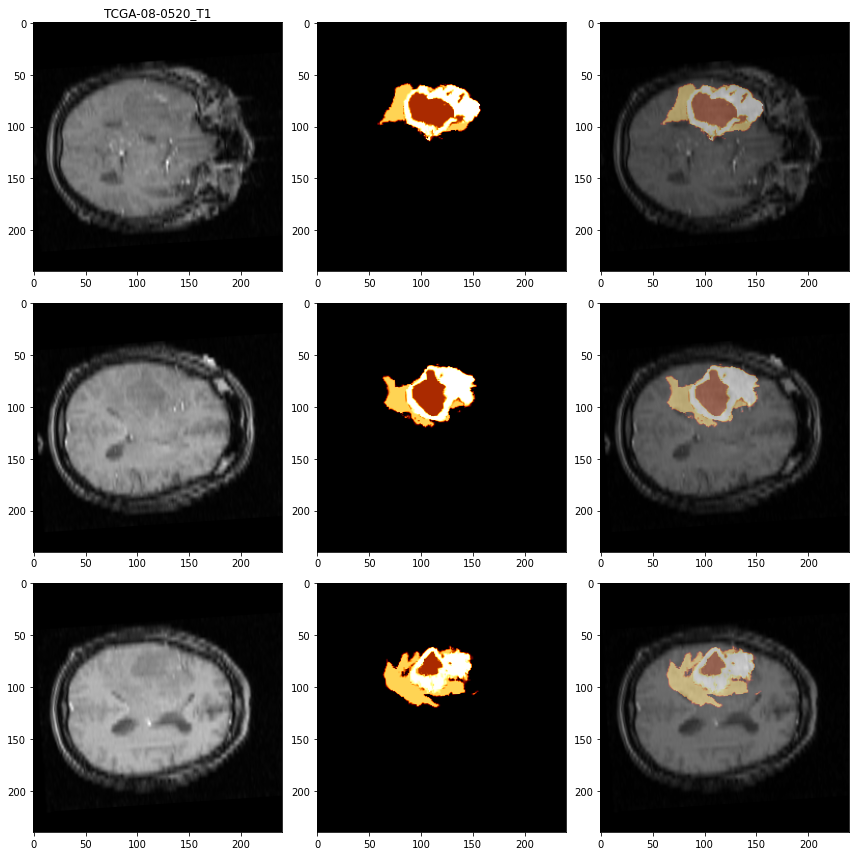

In [155]:
plot_qc(image, mask, patient_id ='TCGA-08-0520_T1')

In [39]:
mask = ants.image_read('/anvar/public_datasets/preproc_study/schw/2a_interp/VS-SEG-206/T1_SEG.nii.gz')
image = ants.image_read('/anvar/public_datasets/preproc_study/schw/2a_interp/VS-SEG-206/T1.nii.gz')

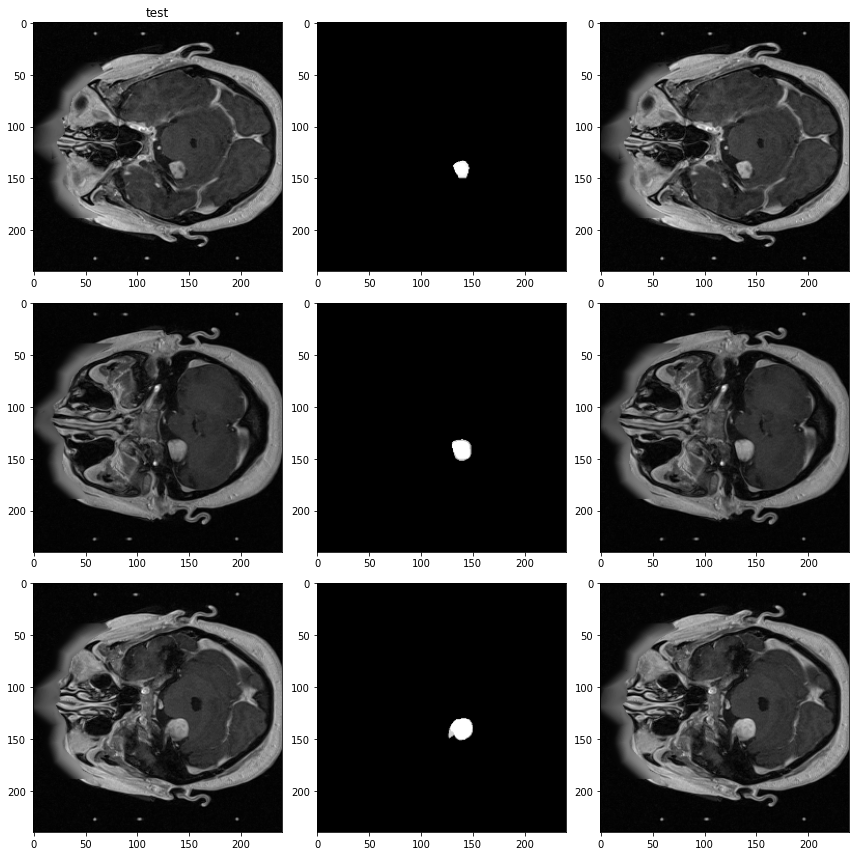

In [40]:
plot_qc(image, mask, patient_id ='test')

### Zoomed sections

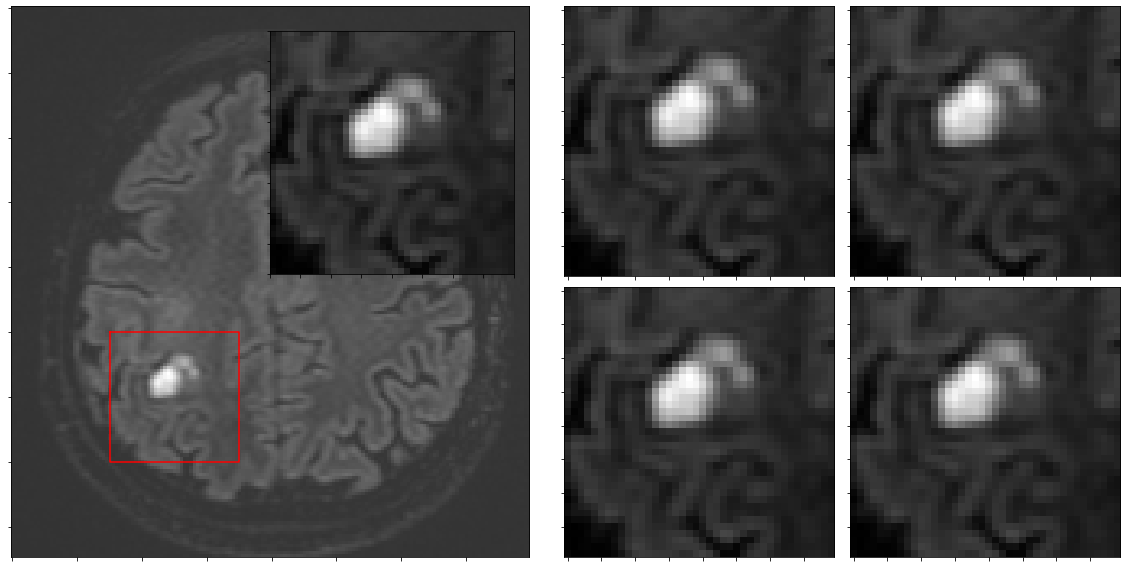

In [1]:
import matplotlib.pyplot as plt
import nibabel
import numpy as np
import pandas as pd
from pathlib import Path
from skimage.transform import rescale

root = Path('/anvar/public_datasets/preproc_study/bgpd/') # 1_reg/255_18'
img = nibabel.load(root / '1_reg' / '255_18' / 'FLAIR.nii.gz')# .get_fdata()
zooms = img.header.get_zooms()

x = rescale(img.get_fdata(), zooms)
y = x[..., 170].T
y = y[::-1, :]
y = y[40:210, :]
y2 = y[100:140, 30:70]

fig = plt.figure(figsize=(16,8))
ax0 = plt.subplot2grid((2, 4), (0, 0), colspan=2, rowspan=2)
ax0.imshow(y, cmap='gray', alpha=0.8);

ax1 = plt.subplot2grid((2, 4), (0, 2))
ax2 = plt.subplot2grid((2, 4), (0, 3))
ax3 = plt.subplot2grid((2, 4), (1, 2))
ax4 = plt.subplot2grid((2, 4), (1, 3))

ax1.imshow(y2, cmap='gray');
ax2.imshow(y2, cmap='gray');
ax3.imshow(y2, cmap='gray');
ax4.imshow(y2, cmap='gray');

axins = ax0.inset_axes([0.5, 0.5, 0.47, 0.47])
axins.imshow(y2[::-1, :], cmap='gray', extent=(100, 140, 30, 70), origin='lower')


for ax in [ax0, ax1, ax2, ax3, ax4, axins]:
    ax.set_xticklabels([])
    ax.set_yticklabels([])

ax0.plot([30,70,70,30, 30], [100, 100, 140, 140, 100], c='r')
    
plt.tight_layout()

(240, 240, 155)
(240, 240, 155)


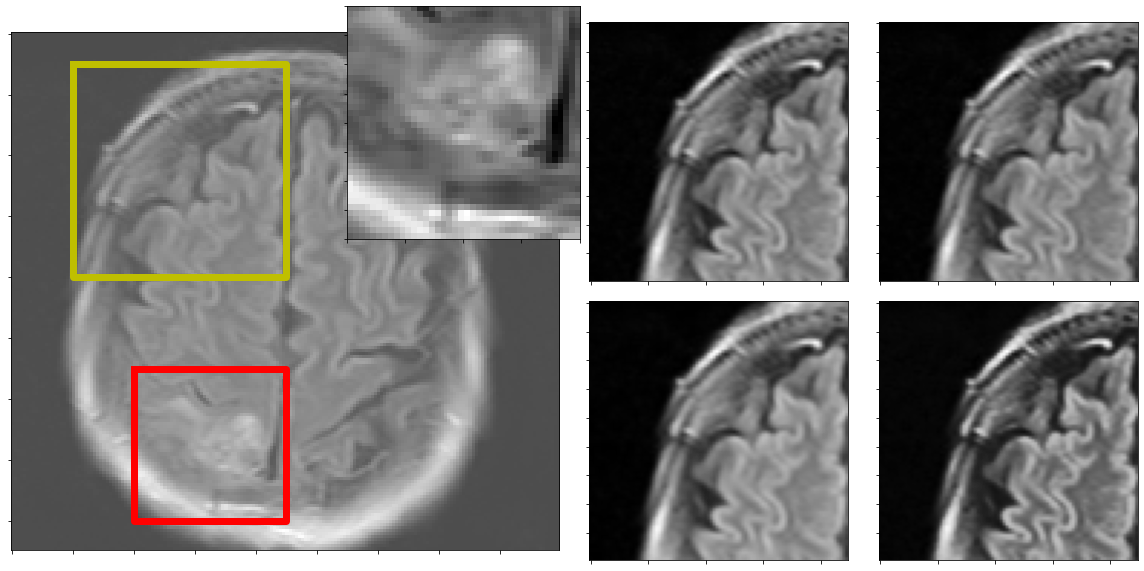

In [267]:
root = Path('/anvar/public_datasets/preproc_study/bgpd/') # 1_reg/255_18'
img = nibabel.load(root / '3a_atlas' / '541_18' / 'FLAIR.nii.gz')# .get_fdata()
img_n4 = nibabel.load(root / '3b_n4' / '541_18' / 'FLAIR.nii.gz')# .get_fdata()
img_susan = nibabel.load(root / '3d_susan' / '541_18' / 'FLAIR.nii.gz')# .get_fdata()
img_hist = nibabel.load(root / '6_hist/6_hist_fold_1' / '541_18' / 'FLAIR.nii.gz')# .get_fdata()
zooms = img.header.get_zooms()
print(x.shape)
x = rescale(img.get_fdata(), zooms)
y = x[..., 115].T
y = y[::-1, :]
y = y[40:210, 30:-30]
y2 = y[10:100, 0:90]
y3 = y[120:160, 50:90]

zooms = img_n4.header.get_zooms()
print(img_n4.shape)
img_n4_x = rescale(img_n4.get_fdata(), zooms)
img_n4_y = img_n4_x[..., 115].T
img_n4_y = img_n4_y[::-1, :]
img_n4_y = img_n4_y[40:210, 30:-10]
img_n4_y2 = img_n4_y[10:100, 0:90]

zooms = img_susan.header.get_zooms()
img_susan_x = rescale(img_susan.get_fdata(), zooms)
img_susan_y = img_susan_x[..., 115].T
img_susan_y = img_susan_y[::-1, :]
img_susan_y = img_susan_y[40:210, 30:-10]
img_susan_y2 = img_susan_y[10:100, 0:90]

zooms = img_hist.header.get_zooms()
img_hist_x = rescale(img_hist.get_fdata(), zooms)
img_hist_y = img_hist_x[..., 115].T
img_hist_y = img_hist_y[::-1, :]
img_hist_y = img_hist_y[40:210, 30:-10]
img_hist_y2 = img_hist_y[10:100, 0:90]

fig = plt.figure(figsize=(16,8))
ax0 = plt.subplot2grid((2, 4), (0, 0), colspan=2, rowspan=2)
ax0.imshow(y, cmap='gray', alpha=0.7);

ax1 = plt.subplot2grid((2, 4), (0, 2))
ax2 = plt.subplot2grid((2, 4), (0, 3))
ax3 = plt.subplot2grid((2, 4), (1, 2))
ax4 = plt.subplot2grid((2, 4), (1, 3))

ax1.imshow(y2, cmap='gray');
ax2.imshow(img_n4_y2, cmap='gray');
ax3.imshow(img_susan_y2, cmap='gray');
ax4.imshow(img_hist_y2, cmap='gray');

axins = ax0.inset_axes([0.6, 0.6, 0.45, 0.45])
axins.imshow(y3[::-1, :], cmap='gray', extent=(120, 160, 80, 120), origin='lower')


for ax in [ax0, ax1, ax2, ax3, ax4, axins]:
    ax.set_xticklabels([])
    ax.set_yticklabels([])

ax0.plot([20, 90, 90, 20, 20], [10, 10, 80, 80, 10], c='y', linewidth=7.0, label ='Artifact')
ax0.plot([40, 90, 90, 40, 40], [110, 110, 160, 160, 110], c='r', linewidth=7.0, label = 'Tumor tissue') 
plt.savefig('512_flair_.png', dpi=300, transparent=True)
plt.tight_layout()

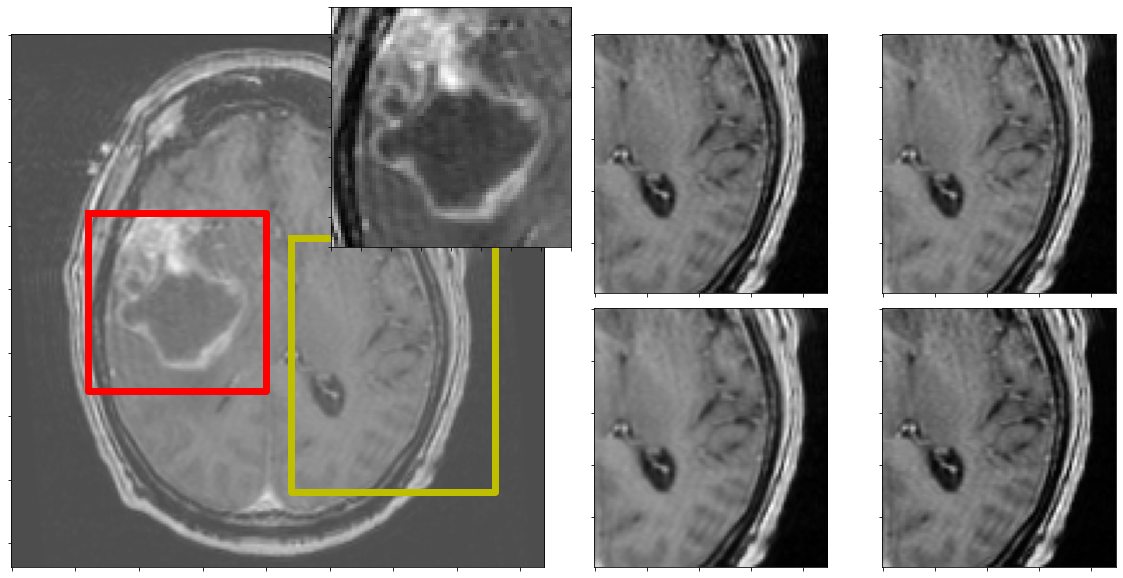

In [262]:
root = Path('/anvar/public_datasets/preproc_study/gbm/') # 1_reg/255_18'
img = nibabel.load(root / '3a_atlas' / 'TCGA-08-0520' / 'CT1.nii.gz')# .get_fdata()
img_n4 = nibabel.load(root / '3b_n4' / 'TCGA-08-0520' / 'CT1.nii.gz')# .get_fdata()
img_susan = nibabel.load(root / '3d_susan' / 'TCGA-08-0520' / 'CT1.nii.gz')# .get_fdata()
img_hist = nibabel.load(root / '6_hist/6_hist_fold_0/' / 'TCGA-08-0520' / 'CT1.nii.gz')# .get_fdata()

def prep_img(img):
    zooms = img.header.get_zooms()
    x = rescale(img.get_fdata(), zooms)
    y = x[..., 72].T
    y = y[::-1, :]
    y = y[20:230, 20:-10]
    y2 = y[80:180, 100:190]
    y3 = y[70:140, 30:100]
    return (y, y2, y3)

y, y2, y3 = prep_img(img)
img_n4_y, img_n4_y2, _ = prep_img(img_n4)
img_hist_y, img_hist_y2, _ = prep_img(img_hist)
img_susan_y, img_susan_y2, _ = prep_img(img_susan)

fig = plt.figure(figsize=(16,8))
ax0 = plt.subplot2grid((2, 4), (0, 0), colspan=2, rowspan=2)
ax0.imshow(y, cmap='gray', alpha=0.7);

ax1 = plt.subplot2grid((2, 4), (0, 2))
ax2 = plt.subplot2grid((2, 4), (0, 3))
ax3 = plt.subplot2grid((2, 4), (1, 2))
ax4 = plt.subplot2grid((2, 4), (1, 3))

ax1.imshow(y2, cmap='gray');
ax2.imshow(img_n4_y2, cmap='gray');
ax3.imshow(img_susan_y2, cmap='gray');
ax4.imshow(img_hist_y2, cmap='gray');

axins = ax0.inset_axes([0.6, 0.6, 0.45, 0.45])
axins.imshow(y3[::-1, :], cmap='gray', extent=(120, 160, 80, 120), origin='lower')


for ax in [ax0, ax1, ax2, ax3, ax4, axins]:
    ax.set_xticklabels([])
    ax.set_yticklabels([])

ax0.plot([110, 190, 190, 110, 110], [80, 80, 180, 180, 80], c='y', linewidth=7.0)
ax0.plot([30, 100, 100, 30, 30], [70, 70, 140, 140, 70], c='r', linewidth=7.0)   
plt.savefig('TCGA-08-0520__се1_.png', dpi=300, transparent=True)
plt.tight_layout()

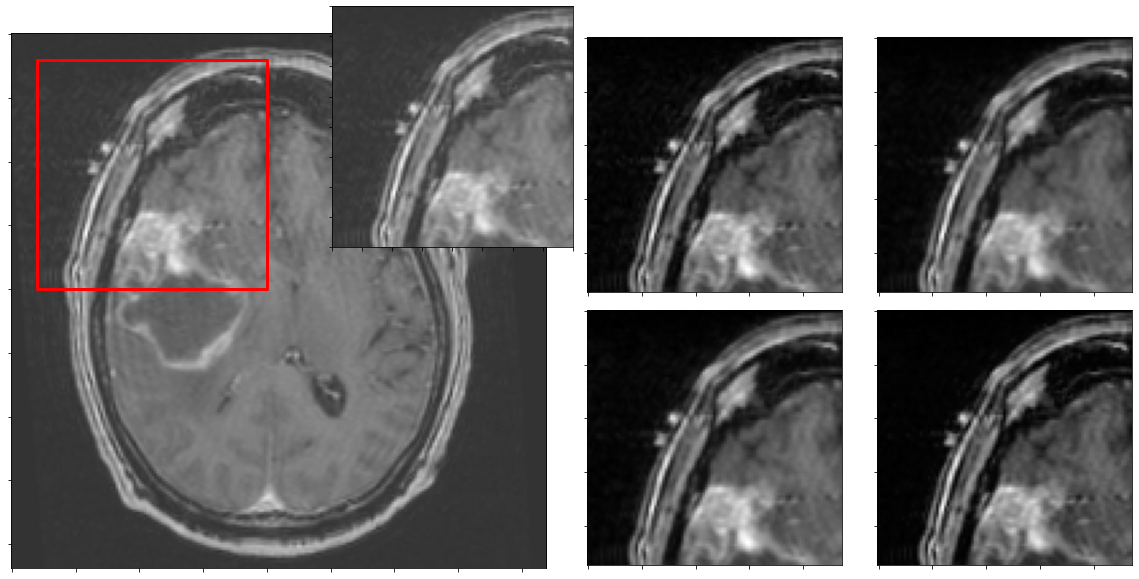

In [269]:
root = Path('/anvar/public_datasets/preproc_study/gbm/') # 1_reg/255_18'
img = nibabel.load(root / '3a_atlas' / 'TCGA-08-0520' / 'CT1.nii.gz')# .get_fdata()
img_n4 = nibabel.load(root / '3b_n4' / 'TCGA-08-0520' / 'CT1.nii.gz')# .get_fdata()
img_susan = nibabel.load(root / '3d_susan' / 'TCGA-08-0520' / 'CT1.nii.gz')# .get_fdata()
img_susan_n4 = nibabel.load(root / '3c_n4_susan' / 'TCGA-08-0520' / 'CT1.nii.gz')# .get_fdata()
img_hist = nibabel.load(root / '6_hist/6_hist_fold_0/' / 'TCGA-08-0520' / 'CT1.nii.gz')# .get_fdata()

def prep_img(img):
    zooms = img.header.get_zooms()
    x = rescale(img.get_fdata(), zooms)
    y = x[..., 72].T
    y = y[::-1, :]
    y = y[20:230, 20:-10]
    y2 = y[80:180, 100:190]
    y3 = y[70:140, 30:100]
    y2 = y[5:100, 5:100]
    return (y, y2, y3)

y, y2, y3 = prep_img(img)
img_n4_y, img_n4_y2, _ = prep_img(img_n4)
img_hist_y, img_hist_y2, _ = prep_img(img_hist)
img_susan_y, img_susan_y2, _ = prep_img(img_susan)
img_n4_susan_y, img_n4_susan_y2, _ = prep_img(img_susan_n4)

fig = plt.figure(figsize=(16,8))
ax0 = plt.subplot2grid((2, 4), (0, 0), colspan=2, rowspan=2)
ax0.imshow(y, cmap='gray', alpha=0.8);

ax1 = plt.subplot2grid((2, 4), (0, 2))
ax2 = plt.subplot2grid((2, 4), (0, 3))
ax3 = plt.subplot2grid((2, 4), (1, 2))
ax4 = plt.subplot2grid((2, 4), (1, 3))

ax1.imshow(img_n4_y2, cmap='gray');
ax2.imshow(img_susan_y2, cmap='gray');
ax3.imshow(img_n4_susan_y2, cmap='gray');
ax4.imshow(img_hist_y2, cmap='gray');

axins = ax0.inset_axes([0.6, 0.6, 0.45, 0.45])
axins.imshow(y2[::-1, :], cmap='gray', extent=(120, 160, 80, 120), origin='lower', alpha=0.8)


for ax in [ax0, ax1, ax2, ax3, ax4, axins]:
    ax.set_xticklabels([])
    ax.set_yticklabels([])

ax0.plot([10, 100, 100, 10, 10], [10, 10, 100, 100, 10], c='r', linewidth=3.0)
# ax0.plot([30, 100, 100, 30, 30], [70, 70, 140, 140, 70], c='r', linewidth=7.0)
plt.savefig('TCGA-08-0520_сt1_.png', dpi=300, transparent=True)
plt.tight_layout()

In [273]:
np.square(np.subtract(img_n4_susan_y2,y2)).mean()

46.899574806209124

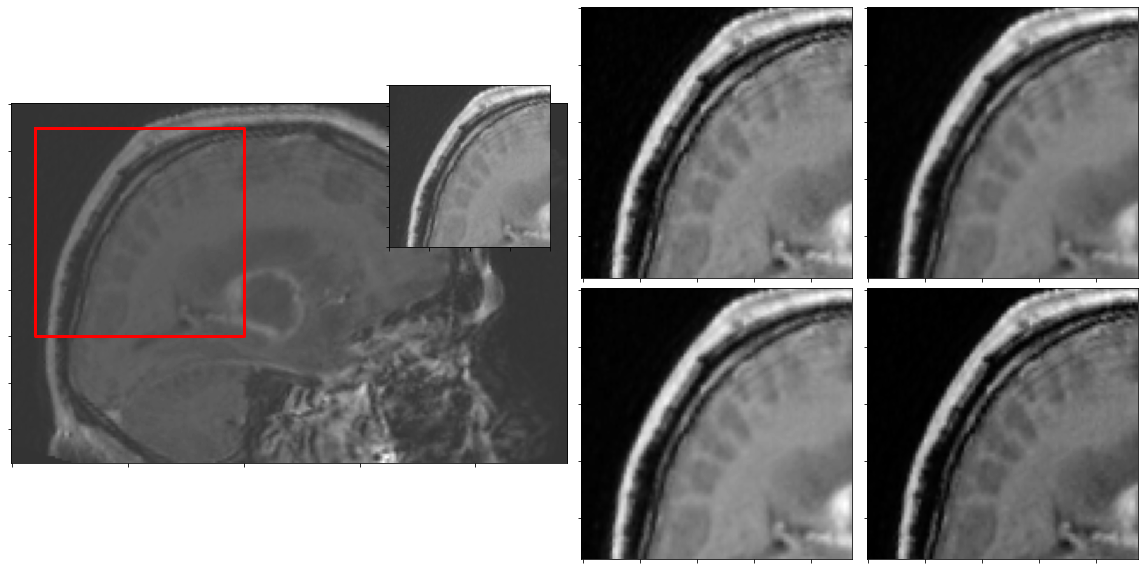

In [288]:
root = Path('/anvar/public_datasets/preproc_study/gbm/') # 1_reg/255_18'
img = nibabel.load(root / '3a_atlas' / 'TCGA-08-0520' / 'CT1.nii.gz')# .get_fdata()
img_n4 = nibabel.load(root / '3b_n4' / 'TCGA-08-0520' / 'CT1.nii.gz')# .get_fdata()
img_susan = nibabel.load(root / '3d_susan' / 'TCGA-08-0520' / 'CT1.nii.gz')# .get_fdata()
img_susan_n4 = nibabel.load(root / '3c_n4_susan' / 'TCGA-08-0520' / 'CT1.nii.gz')# .get_fdata()
img_hist = nibabel.load(root / '6_hist/6_hist_fold_0/' / 'TCGA-08-0520' / 'CT1.nii.gz')# .get_fdata()

def prep_img(img):
    zooms = img.header.get_zooms()
    x = rescale(img.get_fdata(), zooms)
    y = x[100, ...].T
    y = y[::-1, :]
    y = y[:, :]
    y2 = y[80:180, 100:190]
    y3 = y[70:140, 30:100]
    y2 = y[5:100, 5:100]
    return (y, y2, y3)

y, y2, y3 = prep_img(img)
img_n4_y, img_n4_y2, _ = prep_img(img_n4)
img_hist_y, img_hist_y2, _ = prep_img(img_hist)
img_susan_y, img_susan_y2, _ = prep_img(img_susan)
img_n4_susan_y, img_n4_susan_y2, _ = prep_img(img_susan_n4)

fig = plt.figure(figsize=(16,8))
ax0 = plt.subplot2grid((2, 4), (0, 0), colspan=2, rowspan=2)
ax0.imshow(y, cmap='gray', alpha=0.8);

ax1 = plt.subplot2grid((2, 4), (0, 2))
ax2 = plt.subplot2grid((2, 4), (0, 3))
ax3 = plt.subplot2grid((2, 4), (1, 2))
ax4 = plt.subplot2grid((2, 4), (1, 3))

ax1.imshow(img_n4_y2, cmap='gray');
ax2.imshow(img_susan_y2, cmap='gray');
ax3.imshow(img_n4_susan_y2, cmap='gray');
ax4.imshow(img_hist_y2, cmap='gray');

axins = ax0.inset_axes([0.6, 0.6, 0.45, 0.45])
axins.imshow(y2[::-1, :], cmap='gray', extent=(120, 160, 80, 120), origin='lower', alpha=0.8)


for ax in [ax0, ax1, ax2, ax3, ax4, axins]:
    ax.set_xticklabels([])
    ax.set_yticklabels([])

ax0.plot([10, 100, 100, 10, 10], [10, 10, 100, 100, 10], c='r', linewidth=3.0)
# ax0.plot([30, 100, 100, 30, 30], [70, 70, 140, 140, 70], c='r', linewidth=7.0)
plt.savefig('TCGA-08-0520_sag_.png', dpi=300, transparent=True)
plt.tight_layout()